<a href="https://colab.research.google.com/github/honyango/Analog-World-Clock/blob/master/Update_Ham_skinD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import shutil

# Assuming Google Drive is already mounted at /content/drive/
# If not, ensure google.colab.drive.mount('/content/drive') is run first.

file_to_find = 'HAM10000.zip'
source_path = None

# Search for the file in the mounted Google Drive
for root, dirs, files in os.walk('/content/drive/My Drive'):
    if file_to_find in files:
        source_path = os.path.join(root, file_to_find)
        break

if source_path:
    destination_path = os.path.join('/content/', file_to_find)
    shutil.copy(source_path, destination_path)
    print(f"✅ Download complete: '{file_to_find}' copied from '{source_path}' to '{destination_path}'")

    # Unzip the file
    if os.path.exists(destination_path):
        !unzip -o '{destination_path}' # -o to overwrite without prompt
        print(f"✅ Unzip complete for '{file_to_find}'.")
    else:
        print(f"❌ Error: '{file_to_find}' not found after copying, cannot unzip.")
else:
    print(f"❌ Error: '{file_to_find}' not found in Google Drive. Please ensure it's in your mounted Drive.")

❌ Error: 'HAM10000.zip' not found in Google Drive. Please ensure it's in your mounted Drive.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [ ]:
# STEP 1: Install required packages
!pip install tensorflow tqdm --quiet

# STEP 2: Import libraries
import os
import numpy as np
import tensorflow as tf
from PIL import Image
from tqdm import tqdm

# STEP 3: Define paths
input_root = '/content/selected_images'     # Your image dataset path
output_root = '/content/HAM_seg'    # Output folder for segmentation masks
os.makedirs(output_root, exist_ok=True)

# STEP 4: Preprocessing function
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB').resize((128, 128))
    image_array = np.array(image) / 255.0
    return np.expand_dims(image_array, axis=0), image.size

# STEP 5: Dummy segmentation model (replace this with real model later)
def dummy_segmentation_model(image_tensor):
    # Simple green channel threshold for demo purposes
    mask = (image_tensor[0][:, :, 1] > 0.5).astype(np.uint8) * 255
    return mask

# Optional: Load real segmentation model here (U-Net or custom model)
# model = tf.keras.models.load_model('/content/unet_model.h5')

# STEP 6: Iterate over all class folders
for class_name in os.listdir(input_root):
    class_input_path = os.path.join(input_root, class_name)

    # Skip non-directories like .DS_Store
    if not os.path.isdir(class_input_path):
        continue

    class_output_path = os.path.join(output_root, class_name)
    os.makedirs(class_output_path, exist_ok=True)

    # STEP 7: Process each image
    for img_name in tqdm(os.listdir(class_input_path), desc=f"Processing {class_name}"):
        img_path = os.path.join(class_input_path, img_name)

        # Skip non-image files
        if not img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        try:
            img_tensor, original_size = preprocess_image(img_path)

            # Real model prediction (uncomment when using real model)
            # prediction = model.predict(img_tensor)
            # mask = (prediction[0, :, :, 0] > 0.5).astype(np.uint8) * 255

            # Dummy segmentation
            mask = dummy_segmentation_model(img_tensor)

            # Resize mask back to original image size and save
            mask_image = Image.fromarray(mask).resize(original_size)
            mask_image.save(os.path.join(class_output_path, img_name))

        except Exception as e:
            print(f"❌ Failed to process {img_path}: {e}")


Processing bkl: 100%|██████████| 500/500 [00:01<00:00, 361.17it/s]


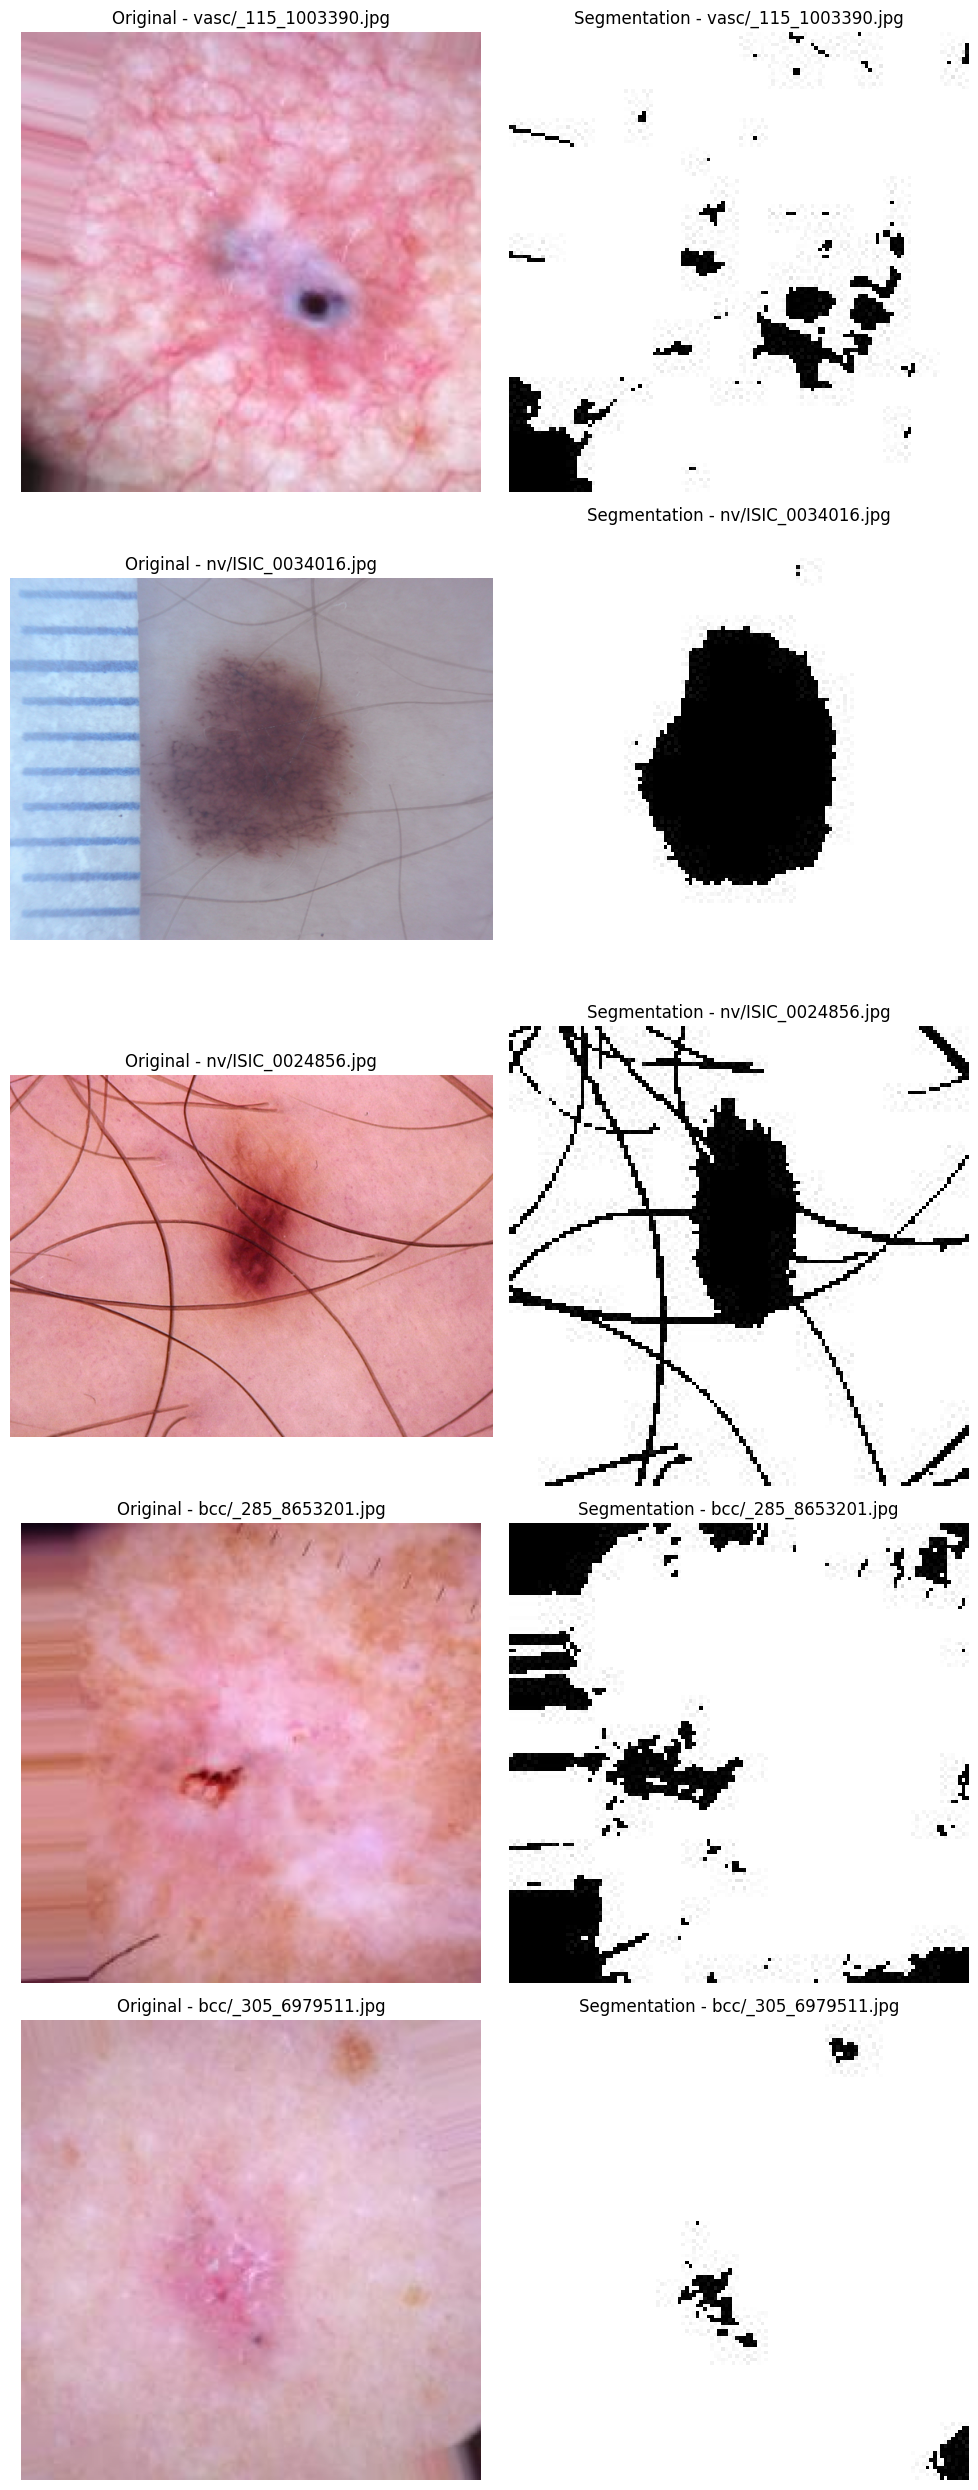

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Paths
original_path = '/content/selected_images'
segmented_path = '/content/HAM_seg'

# How many samples to show
num_samples = 5

# Collect valid (class, image) pairs
samples = []
for class_name in os.listdir(original_path):
    class_orig = os.path.join(original_path, class_name)
    class_seg = os.path.join(segmented_path, class_name)

    if not os.path.isdir(class_orig) or not os.path.isdir(class_seg):
        continue

    images = [f for f in os.listdir(class_orig) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    for img in images:
        if os.path.exists(os.path.join(class_seg, img)):
            samples.append((class_name, img))

# Randomly select samples
selected_samples = random.sample(samples, min(num_samples, len(samples)))

# Plotting
fig, axes = plt.subplots(len(selected_samples), 2, figsize=(10, 5 * len(selected_samples)))

for i, (cls, img_name) in enumerate(selected_samples):
    orig_img = Image.open(os.path.join(original_path, cls, img_name))
    seg_img = Image.open(os.path.join(segmented_path, cls, img_name))

    axes[i, 0].imshow(orig_img)
    axes[i, 0].set_title(f"Original - {cls}/{img_name}")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(seg_img, cmap='gray')
    axes[i, 1].set_title(f"Segmentation - {cls}/{img_name}")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# STEP 1: Install and import libraries
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# STEP 2: Define dataset paths
dataset_path = '/content/HAM_seg'

In [ ]:
# STEP 3: Image size and parameters
image_size = 224
input_shape = (image_size, image_size, 3)
batch_size = 32
num_classes = len(os.listdir(dataset_path))  # auto-detect number of classes

In [ ]:

# STEP 4: Create train and validation generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 2800 images belonging to 7 classes.
Found 700 images belonging to 7 classes.


In [ ]:
# STEP 5: Build your CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# STEP 6: Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# STEP 7: Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.9657 - loss: 0.1111 - val_accuracy: 0.2571 - val_loss: 6.0316
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9639 - loss: 0.1272 - val_accuracy: 0.2843 - val_loss: 6.4139
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9607 - loss: 0.1205 - val_accuracy: 0.2671 - val_loss: 6.4437
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9650 - loss: 0.1103 - val_accuracy: 0.2671 - val_loss: 5.3912
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.9688 - loss: 0.1064 - val_accuracy: 0.2657 - val_loss: 6.1789
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9732 - loss: 0.0856 - val_accuracy: 0.2514 - val_loss: 5.4428
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9741 - loss: 0.0713 - val_accuracy: 0.2486 - val_loss: 6.2219
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.9765 - loss: 0.0643 - val_accuracy: 0.2571 -

In [ ]:
# STEP 8: Evaluate model
loss, acc = model.evaluate(val_generator)
print(f"\n✅ Validation Accuracy: {acc*100:.2f}%")


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.2181 - loss: 5.1504

✅ Validation Accuracy: 25.57%


In [ ]:
# STEP 9: Classification report
val_generator.reset()
preds = model.predict(val_generator, verbose=1)
y_pred = preds.argmax(axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step

Classification Report:
              precision    recall  f1-score   support

       akiec       0.30      0.30      0.30       100
         bcc       0.20      0.14      0.16       100
         bkl       0.12      0.11      0.11       100
          df       0.31      0.18      0.23       100
         mel       0.21      0.18      0.20       100
          nv       0.29      0.61      0.39       100
        vasc       0.33      0.27      0.30       100

    accuracy                           0.26       700
   macro avg       0.25      0.26      0.24       700
weighted avg       0.25      0.26      0.24       700



In [ ]:

# STEP 10: Save model
model.save('/content/ham_cnn_model.h5')
print("✅ Model saved as ham_cnn_model.h5")


✅ Model saved as ham_cnn_model.h5


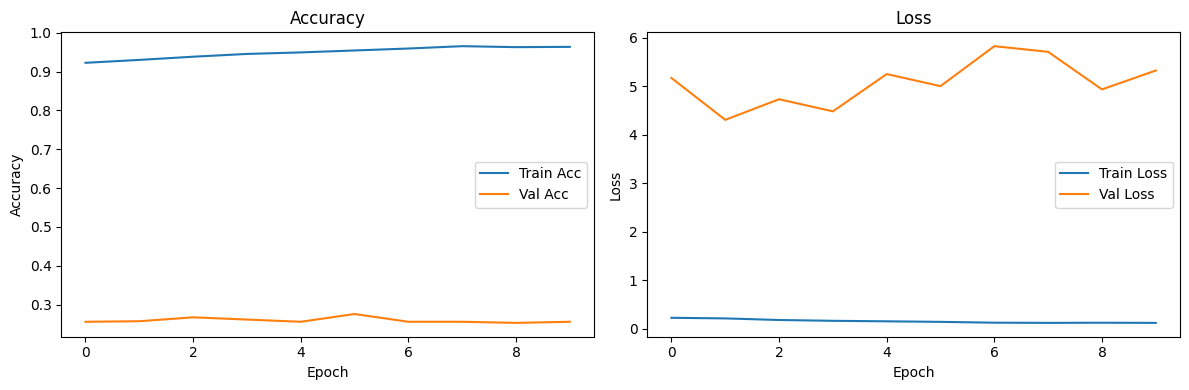

In [ ]:
# STEP 11: Plot accuracy/loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()
